### Setup


In [3]:
import deeplake
from deeplake import Dataset
from plots import plot

ds: Dataset = deeplake.load("hub://activeloop/icdar-2013-text-localize-train")


class iArray(list):
    def map(self, *functions):
        result = self
        for func in functions:
            result = list(map(func, result))
        return iArray(result)

    def show(self, img):
        plot([img, *self])

|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/icdar-2013-text-localize-train



hub://activeloop/icdar-2013-text-localize-train loaded successfully.



### Idx


In [4]:
from random import randint
import cv2
from skimage.color import rgb2gray
from skimage.feature import canny
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle
import numpy as np

idx = randint(0, 230)
# idx = 118
img = ds.images[idx].numpy()

### Bilateral Filters


#### Standard Bilateral Filter


In [ ]:


# iters = [cv2.bilateralFilter(img, 10, i, i) for i in range(100, 400, 100)]
# imgs = (
#     iArray([img, denoise_bilateral(img, channel_axis=-1), *iters])
#     .map(rgb2gray, canny)
#     .show(img)
# )

#### Bilateral Texture Filter


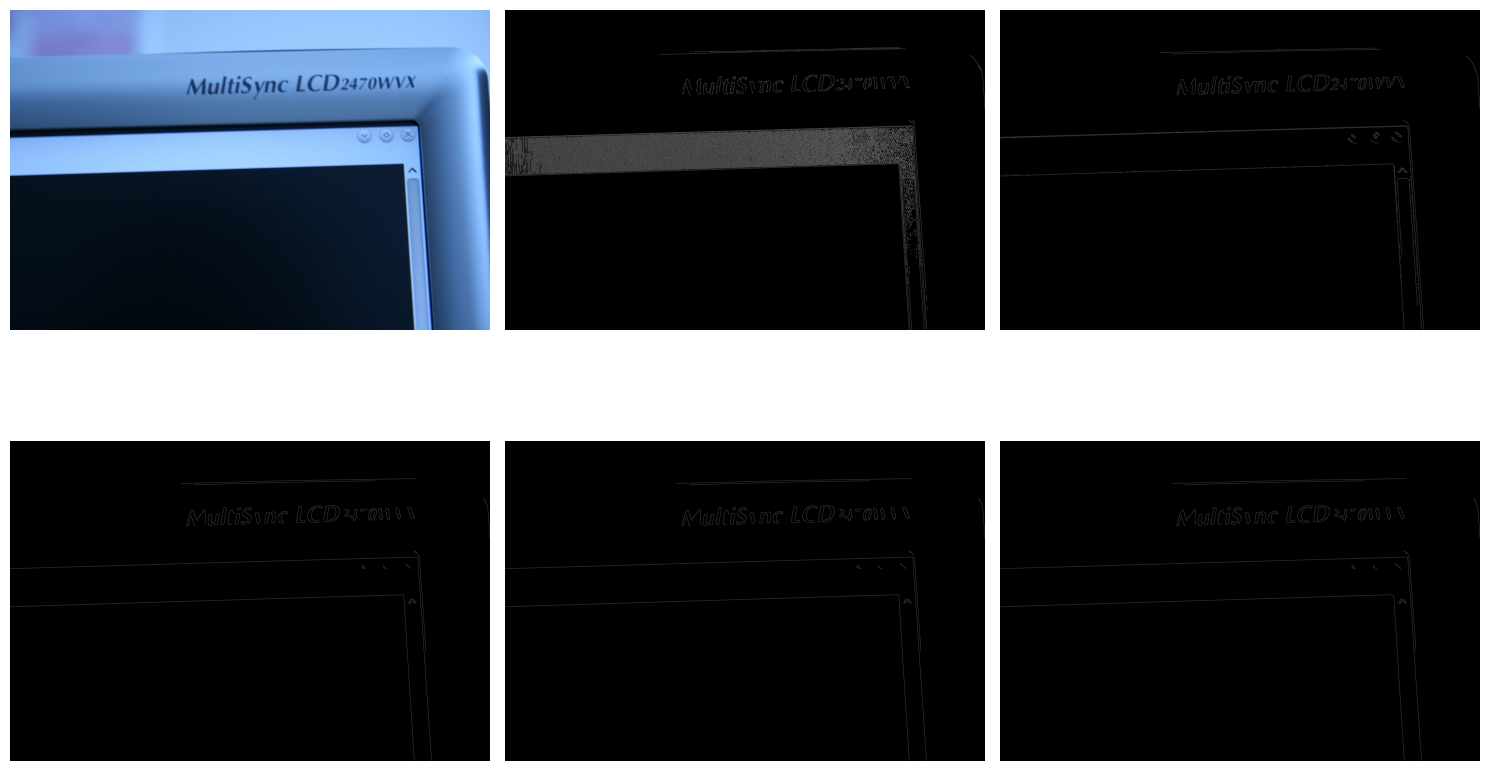

In [ ]:
iters = [
    cv2.ximgproc.bilateralTextureFilter(img, sigmaAlpha=i, sigmaAvg=i)
    for i in range(-1, 600, 200)
]
imgs = iArray([img, *iters]).map(rgb2gray, canny).show(img)

#### Joint Bilateral Filter


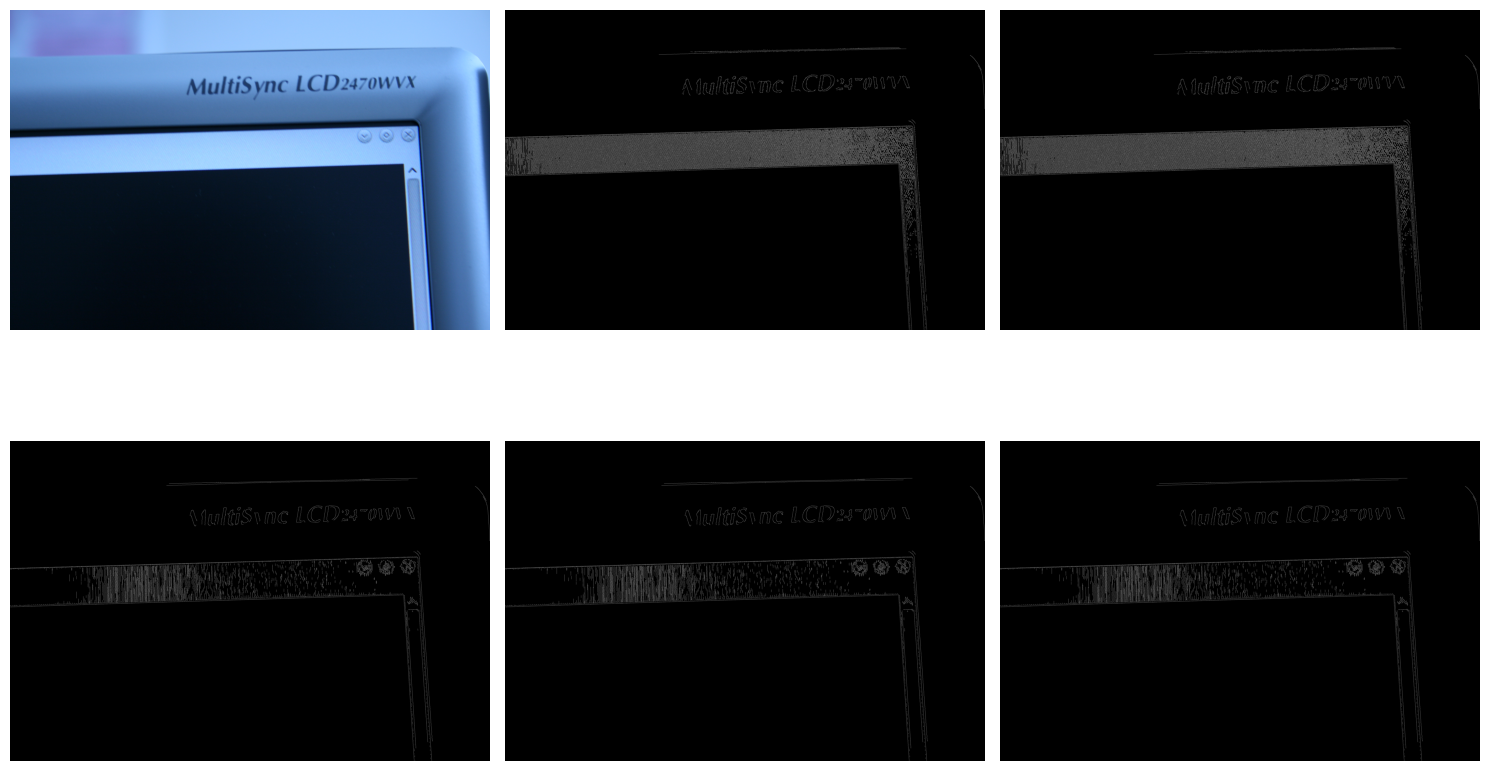

In [ ]:
iters = [
    cv2.ximgproc.jointBilateralFilter(img, img, d=5, sigmaColor=i, sigmaSpace=i)
    for i in range(-1, 600, 200)
]
imgs = iArray([img, *iters]).map(rgb2gray, canny).show(img)

#### Guided Filter


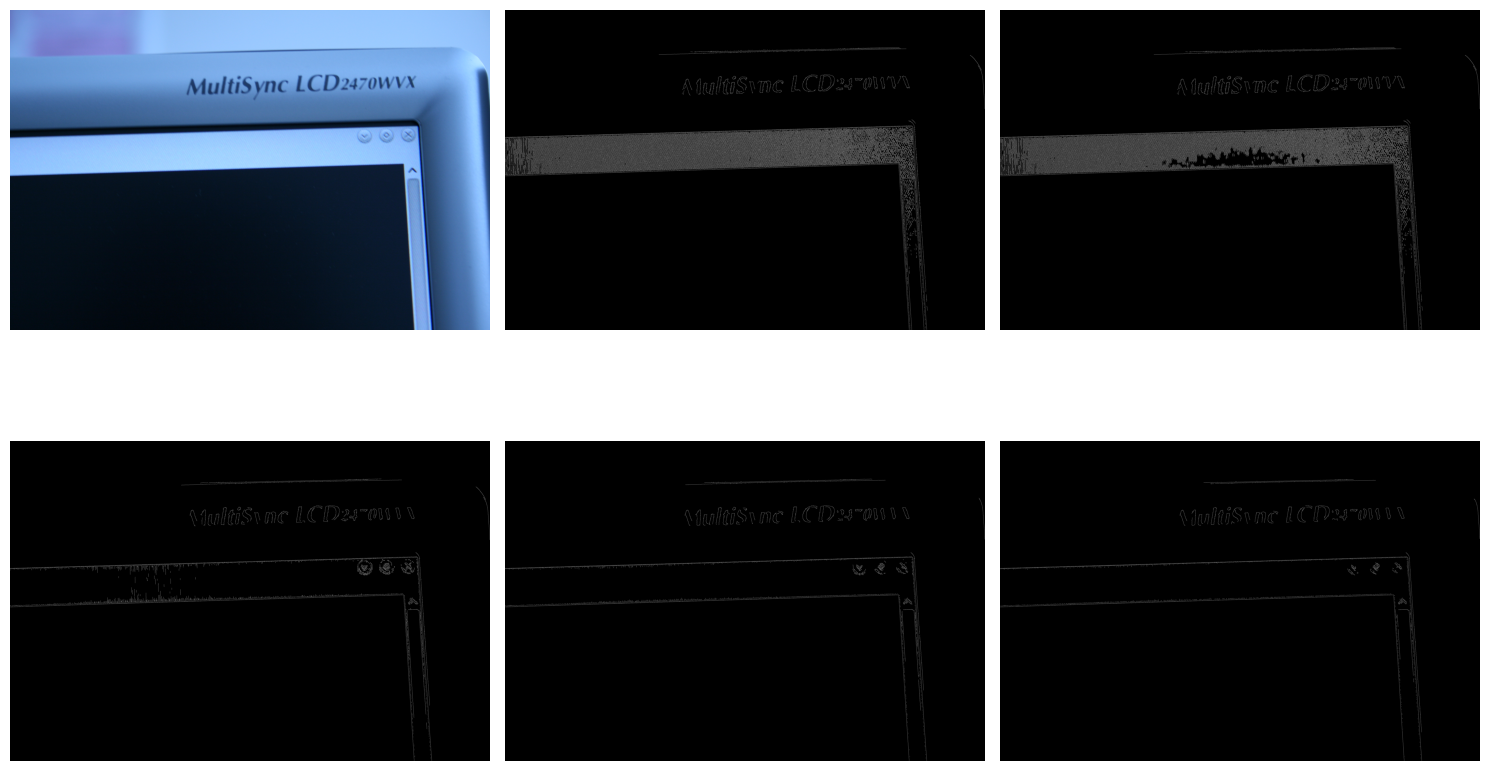

In [ ]:
iters = [
    cv2.ximgproc.guidedFilter(img, img, radius=10, eps=i) for i in range(0, 800, 200)
]
imgs = iArray([img, *iters]).map(rgb2gray, canny).show(img)

### Weighted Median Filter


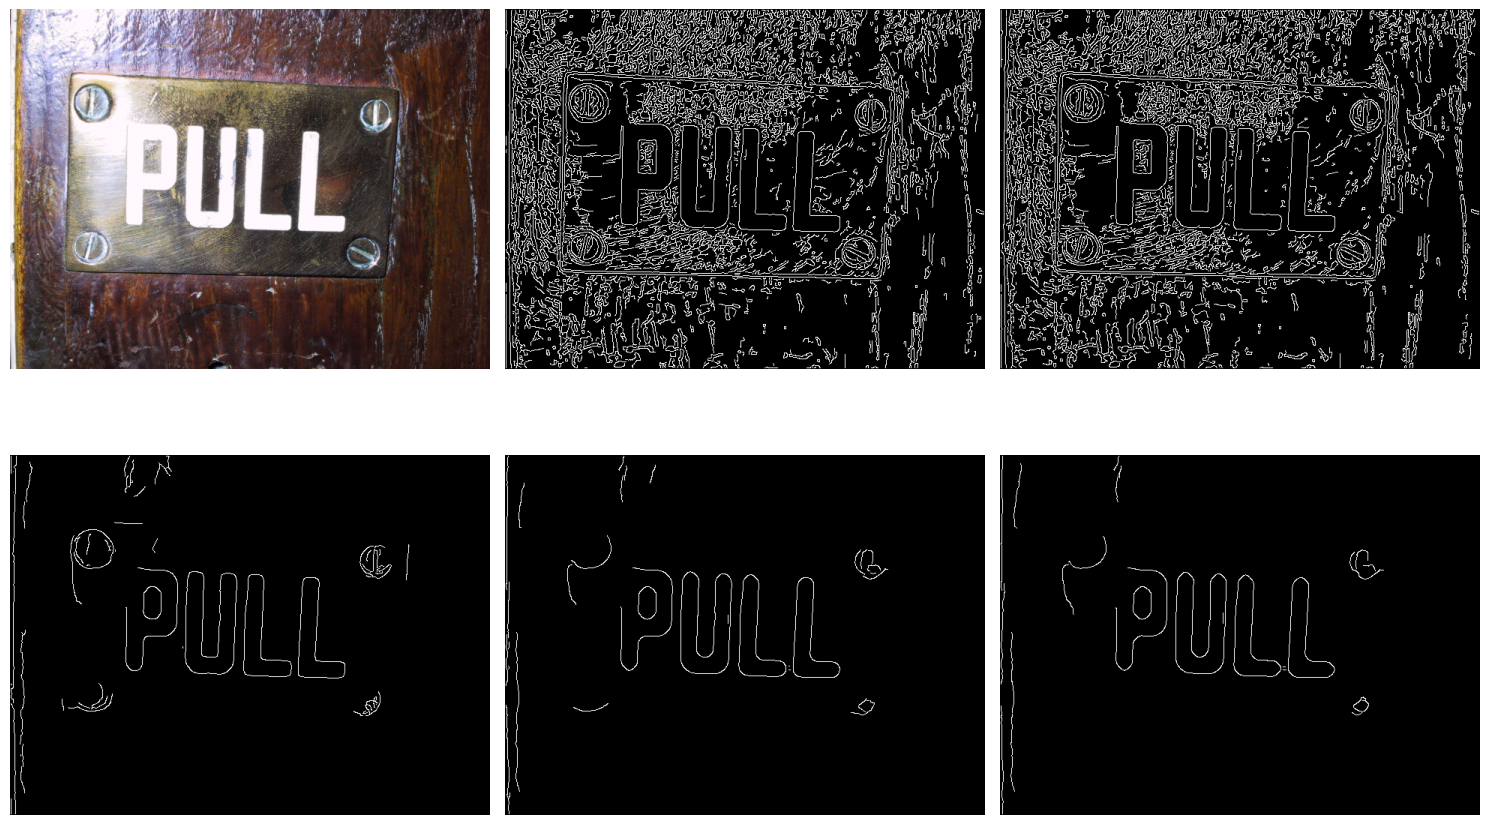

In [ ]:
iters = [
    cv2.ximgproc.weightedMedianFilter(img, img, r=10, sigma=i)
    for i in range(1, 800, 200)
]
imgs = iArray([img, *iters]).map(rgb2gray, canny).show(img)

### Edge Preserving Filter


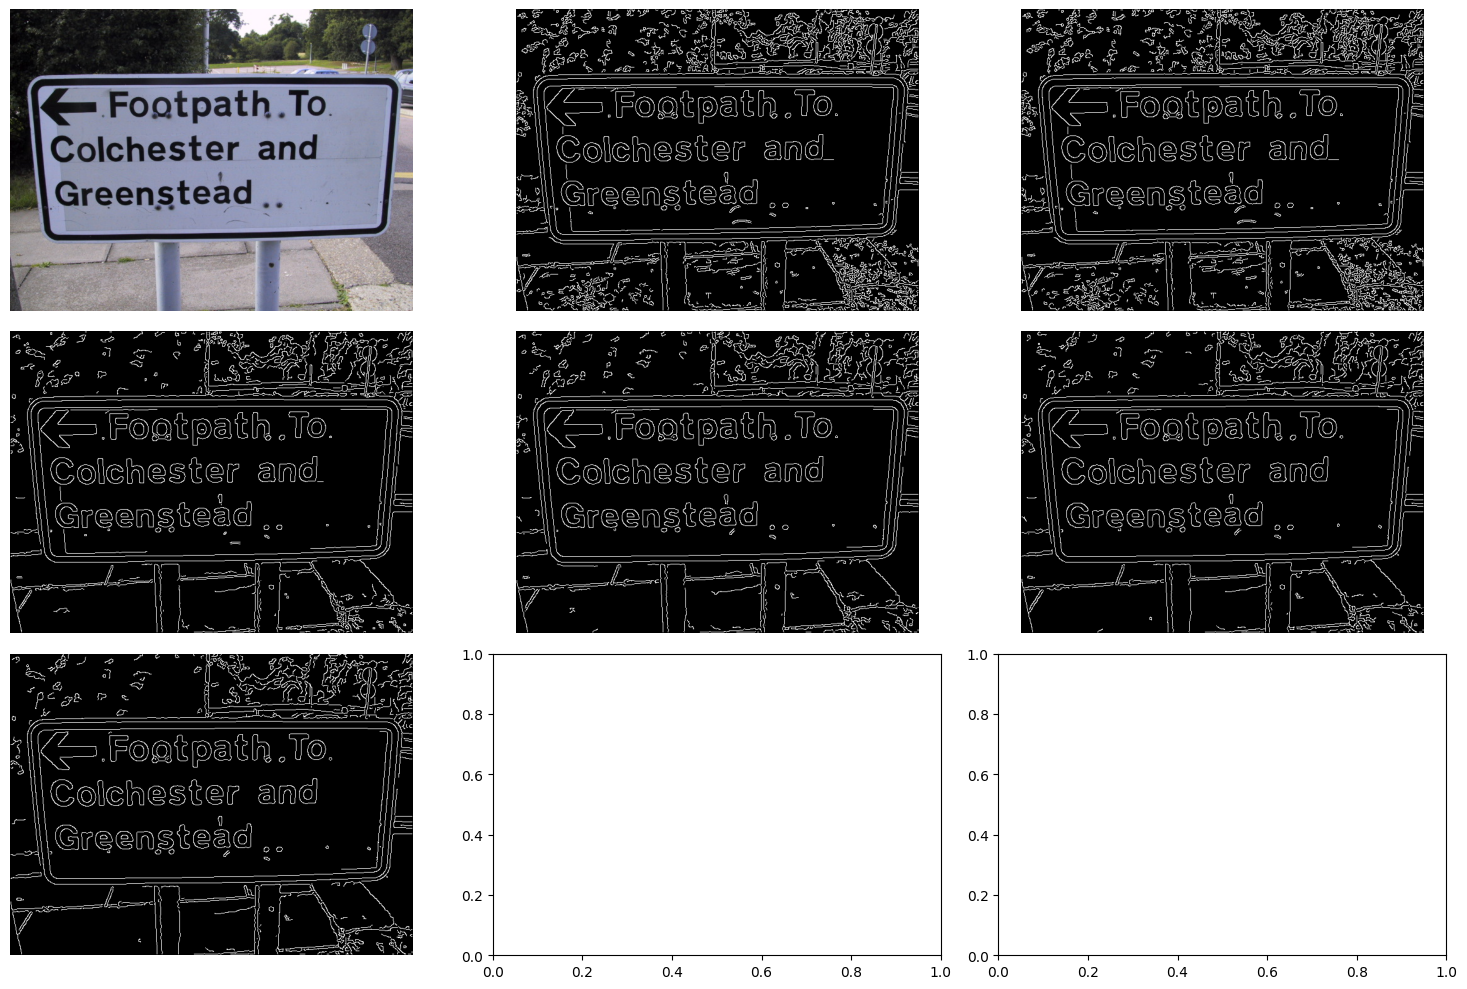

In [ ]:
iters = [
    cv2.ximgproc.edgePreservingFilter(img, d=3, threshold=i) for i in range(1, 100, 20)
]
imgs = iArray([img, *iters]).map(rgb2gray, canny).show(img)

### Anisotropic Diffusion


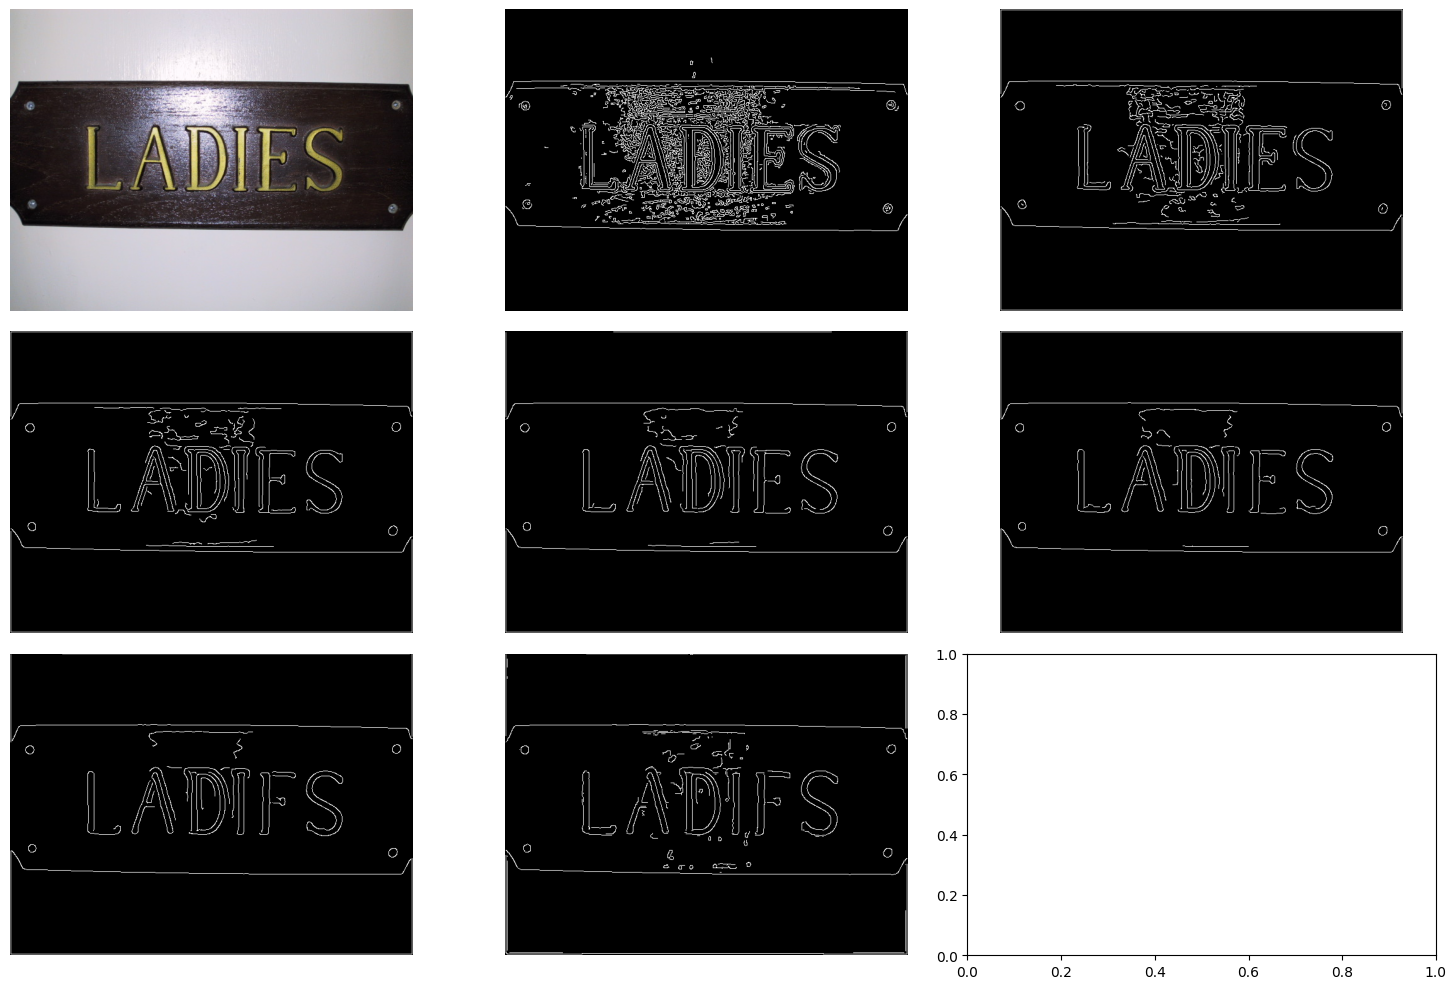

In [ ]:
import numpy as np
iters = [
    cv2.ximgproc.anisotropicDiffusion(img, i, 100, 10) for i in np.arange(0.04, 0.2, 0.03)
]
imgs = iArray([img, *iters]).map(rgb2gray, canny).show(img)

### Total Variation Filter


In [5]:
from skimage.restoration import denoise_tv_chambolle

iters = [denoise_tv_chambolle(img)]
imgs = iArray([img, *iters]).map(rgb2gray, canny).show(img)

KeyboardInterrupt: 